In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
plt.style.use('sensitivity.mplstyle')
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [2]:
sens_rn222_scaling_d024 = np.genfromtxt('Data/d024_sensitivity_vs_rn222.csv',\
                                        delimiter=',',\
                                        skip_header=1)
sens_xe137_scaling_d024 = np.genfromtxt('Data/d024_sensitivity_vs_xe137.csv',\
                                        delimiter=',',\
                                        skip_header=1)
sens_gamma_scaling_d024 = np.genfromtxt('Data/d024_sensitivity_vs_gammabkgs.csv',\
                                        delimiter=',',\
                                        skip_header=1)
dp_gamma_scaling_d024 = np.genfromtxt('Data/d024_dp_vs_gamma.csv',\
                                       delimiter=',',\
                                       skip_header=1)
dp_rn222_scaling_d024 = np.genfromtxt('Data/d024_dp_vs_rn222.csv',\
                                       delimiter=',',\
                                       skip_header=1)
dp_xe137_scaling_d024 = np.genfromtxt('Data/d024_dp_vs_xe137.csv',\
                                       delimiter=',',\
                                       skip_header=1)

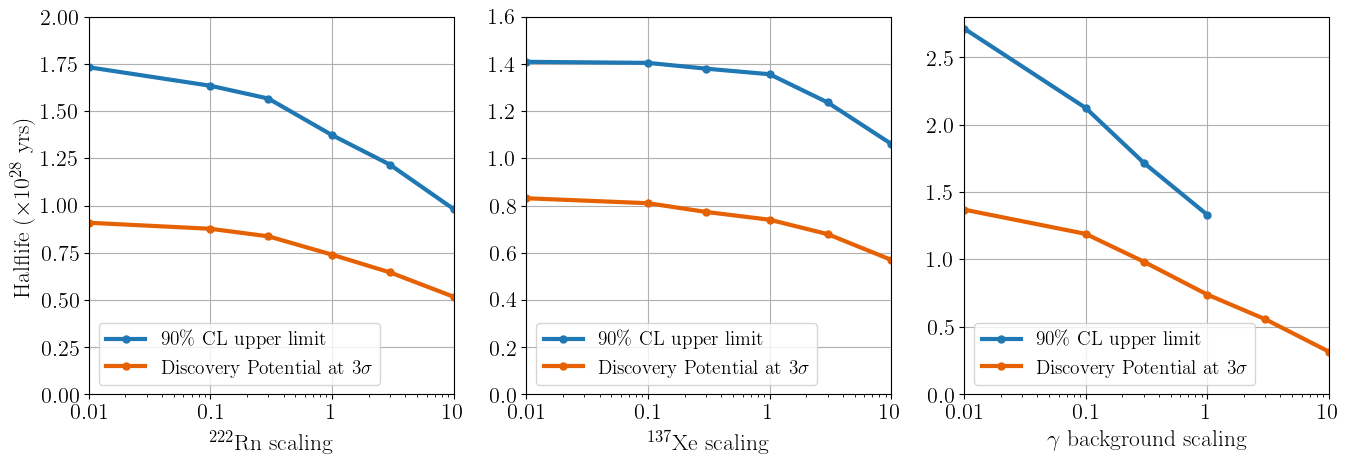

In [3]:
fig, ax = plt.subplots(figsize=(16,5), ncols=3,nrows=1,sharey=False)

# First panel: Rn222 scaling
ax[0].plot(sens_rn222_scaling_d024[:,0],sens_rn222_scaling_d024[:,1],\
           '-o',linewidth=3,markersize=5,label='90\% CL upper limit',color=colors[0])
ax[0].plot(dp_rn222_scaling_d024[:,0],dp_rn222_scaling_d024[:,1]/1.e28,\
           '-o',linewidth=3,markersize=5,label='Discovery Potential at $3\sigma$',color=colors[1])
ax[0].set_xscale('log')
ax[0].set_xlabel(r'$^{222}$Rn scaling')
ax[0].set_ylabel(r'Halflife ($\times 10^{28}$ yrs)')
ax[0].set_xlim(0.01,10.)
ax[0].set_ylim(0.,2.0)
ax[0].set_xticks([0.01,0.1,1,10])
ax[0].get_xaxis().set_major_formatter(matplotlib.ticker.FixedFormatter([0.01,0.1,1,10]))
ax[0].legend(loc='lower left',fontsize=14)
ax[0].grid()


# Second panel: Xe137 scaling
ax[1].plot(sens_xe137_scaling_d024[:,0],sens_xe137_scaling_d024[:,1]/1.e28,\
           '-o',linewidth=3,markersize=5,label='90\% CL upper limit',color=colors[0])
ax[1].plot(dp_xe137_scaling_d024[:-1,0],dp_xe137_scaling_d024[:-1,1]/1.e28,\
           '-o',linewidth=3,markersize=5,label='Discovery Potential at $3\sigma$',color=colors[1])
ax[1].set_xscale('log')
ax[1].set_xlabel('$^{137}$Xe scaling')
#ax[1].set_ylabel(r'Halflife ($\times 10^{28}$ yrs)')
ax[1].set_ylim(0.,1.6)
ax[1].set_xlim(0.01,10.)
ax[1].set_xticks([0.01,0.1,1,10])
ax[1].get_xaxis().set_major_formatter(matplotlib.ticker.FixedFormatter([0.01,0.1,1,10]))
ax[1].legend(loc='lower left',fontsize=14)
ax[1].grid()


# Third panel: gamma scaling
ax[2].plot(sens_gamma_scaling_d024[:,0],sens_gamma_scaling_d024[:,1]/1.e28,\
           '-o',linewidth=3,markersize=5,label='90\% CL upper limit',color=colors[0])

ax[2].plot(dp_gamma_scaling_d024[:,0],dp_gamma_scaling_d024[:,1]/1.e28,\
           '-o',linewidth=3,markersize=5,label='Discovery Potential at $3\sigma$',color=colors[1])
ax[2].set_xscale('log')
ax[2].set_xlabel('$\gamma$ background scaling')
#ax[1].set_ylabel(r'Halflife ($\times 10^{28}$ yrs)')
ax[2].set_ylim(0.,2.8)
ax[2].set_xlim(0.01,10.)
ax[2].set_xticks([0.01,0.1,1,10])
ax[2].get_xaxis().set_major_formatter(matplotlib.ticker.FixedFormatter([0.01,0.1,1,10]))
ax[2].legend(loc='lower left',fontsize=14)
ax[2].grid()

plt.savefig('sensitivity_vs_background_scaling.png')

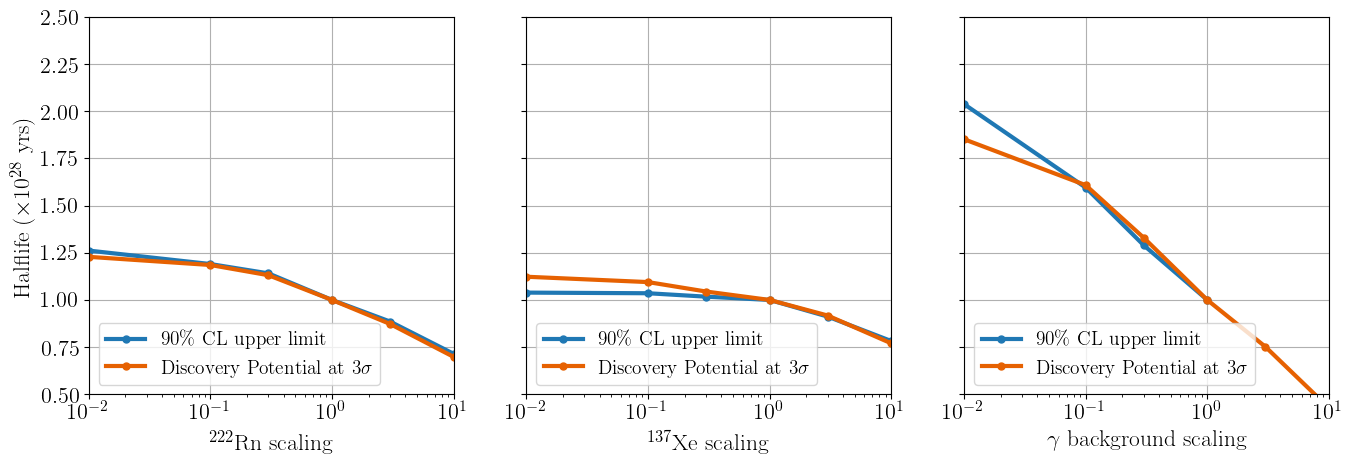

In [4]:
fig, ax = plt.subplots(figsize=(16,5), ncols=3,nrows=1,sharey=True)

# First panel: Rn222 scaling
ax[0].plot(sens_rn222_scaling_d024[:,0], sens_rn222_scaling_d024[:,1]/1.3735244809306786,\
           '-o',linewidth=3,markersize=5,label='90\% CL upper limit',color=colors[0])
ax[0].plot(dp_rn222_scaling_d024[:,0],dp_rn222_scaling_d024[:,1]/7.4e27,\
           '-o',linewidth=3,markersize=5,label='Discovery Potential at $3\sigma$',color=colors[1])
ax[0].set_xscale('log')
ax[0].set_xlabel(r'$^{222}$Rn scaling')
ax[0].set_ylabel(r'Halflife ($\times 10^{28}$ yrs)')
ax[0].set_ylim(0.5,1.5)
ax[0].legend(loc='lower left',fontsize=14)
ax[0].set_xlim(0.01,10.)
ax[0].grid()


# Second panel: Xe137 scaling
ax[1].plot(sens_xe137_scaling_d024[:,0],sens_xe137_scaling_d024[:,1]/1.3566371186729222e+28,\
           '-o',linewidth=3,markersize=5,label='90\% CL upper limit',color=colors[0])
ax[1].plot(dp_xe137_scaling_d024[:-1,0],dp_xe137_scaling_d024[:-1,1]/7.4e27,\
           '-o',linewidth=3,markersize=5,label='Discovery Potential at $3\sigma$',color=colors[1])
ax[1].set_xscale('log')
ax[1].set_xlabel('$^{137}$Xe scaling')
#ax[1].set_ylabel(r'Halflife ($\times 10^{28}$ yrs)')
ax[1].set_ylim(0.5,1.5)
ax[1].set_xlim(0.01,10.)
ax[1].legend(loc='lower left',fontsize=14)
ax[1].grid()


# Third panel: gamma scaling
ax[2].plot(sens_gamma_scaling_d024[:,0],sens_gamma_scaling_d024[:,1]/1.3317446944770887e+28,\
           '-o',linewidth=3,markersize=5,label='90\% CL upper limit',color=colors[0])

ax[2].plot(dp_gamma_scaling_d024[:,0],dp_gamma_scaling_d024[:,1]/7.4e27,\
           '-o',linewidth=3,markersize=5,label='Discovery Potential at $3\sigma$',color=colors[1])
ax[2].set_xscale('log')
ax[2].set_xlabel('$\gamma$ background scaling')
#ax[1].set_ylabel(r'Halflife ($\times 10^{28}$ yrs)')
ax[2].set_ylim(0.5,2.5)
ax[2].set_xlim(0.01,10.)
ax[2].legend(loc='lower left',fontsize=14)
ax[2].grid()

plt.savefig('sensitivity_vs_background_scaling_ratio.png', transparent=False)